In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import quandl as ql
from scipy import stats
from pathlib import Path

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\abuub\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


# NASDAQ CFTC Analysis
#### (i)Clean data; (ii)Calculate 'Net Non-commercial contracts'; (iii)Calculate  z-scores; (iv)Add security data to list; (v)Plot results; (vi) Plot price chart

In [2]:
#Getting CFTC data from Quandl
ql.ApiConfig.api_key = 'tJdgrzhuFvMvkw--DdYw'
nasdaq_data = ql.get('CFTC/209742_FO_L_ALL')
nasdaq_data.head()

,Open Interest,Noncommercial Long,Noncommercial Short,Noncommercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Nonreportable Positions Long,Nonreportable Positions Short
Date,,,,,,,,,,
1999-06-22,537.0,227.0,40.0,0.0,10.0,154.0,237.0,194.0,300.0,343.0
1999-06-29,1299.0,517.0,251.0,0.0,383.0,618.0,900.0,869.0,399.0,430.0
1999-07-06,1525.0,510.0,348.0,5.0,576.0,650.0,1091.0,1003.0,434.0,522.0
1999-07-13,2236.0,1293.0,325.0,5.0,470.0,1399.0,1768.0,1729.0,468.0,507.0
1999-07-20,2653.0,1663.0,450.0,73.0,416.0,1625.0,2152.0,2148.0,501.0,505.0


In [3]:
nas_data_noncommerical = nasdaq_data[['Noncommercial Long','Noncommercial Short']]
nas_data_noncommerical.head()

,Noncommercial Long,Noncommercial Short
Date,,
1999-06-22,227.0,40.0
1999-06-29,517.0,251.0
1999-07-06,510.0,348.0
1999-07-13,1293.0,325.0
1999-07-20,1663.0,450.0


In [4]:
nas_data_noncommerical.to_csv('nasdaq.csv')

In [5]:
nas_data_noncommerical["Net Noncommercial Futures/Options"] = nas_data_noncommerical["Noncommercial Long"] - nas_data_noncommerical["Noncommercial Short"]

C:\Users\abuub\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [6]:
nas_data_noncommerical.head()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options
Date,,,
1999-06-22,227.0,40.0,187.0
1999-06-29,517.0,251.0,266.0
1999-07-06,510.0,348.0,162.0
1999-07-13,1293.0,325.0,968.0
1999-07-20,1663.0,450.0,1213.0


In [7]:
nas_data_noncommerical['zscore']=stats.zscore(nas_data_noncommerical["Net Noncommercial Futures/Options"])

C:\Users\abuub\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
nas_data_noncommerical.head()

,Noncommercial Long,Noncommercial Short,Net Noncommercial Futures/Options,zscore
Date,,,,
1999-06-22,227.0,40.0,187.0,-0.479589
1999-06-29,517.0,251.0,266.0,-0.477927
1999-07-06,510.0,348.0,162.0,-0.480114
1999-07-13,1293.0,325.0,968.0,-0.463167
1999-07-20,1663.0,450.0,1213.0,-0.458016


In [9]:
nas_data_noncommerical.reset_index(inplace=True)
nas_data_noncommerical['year'] = nas_data_noncommerical['Date'].dt.year
nas_data_per_year=nas_data_noncommerical.groupby(['year'])[["zscore"]].mean()

C:\Users\abuub\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# Display sample data
nas_data_per_year.head()

,zscore
year,
1999,-0.450912
2000,-0.540472
2001,-0.481694
2002,-0.482326
2003,0.183499


In [11]:
file_path = Path("Data/nasdaq_rep.csv")
nasdaq_data = pd.read_csv(file_path)
nasdaq_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,2363.479980,2369.689941,2328.739990,2369.310059,2369.310059,870960000
1,1999-01-26,2388.969971,2434.370117,2384.629883,2433.409912,2433.409912,1030160000
2,1999-01-27,2455.250000,2464.120117,2406.780029,2407.139893,2407.139893,1034480000
3,1999-01-28,2442.520020,2477.469971,2407.139893,2477.340088,2477.340088,1013890000
4,1999-01-29,2486.280029,2506.679932,2454.709961,2505.889893,2505.889893,1057120000


In [12]:
nasdaq_data['Date'] = nasdaq_data['Date'].astype('datetime64[ns]') 
nasdaq_data['year'] = nasdaq_data['Date'].dt.year
nasdaq_return_year=nasdaq_data.groupby(['year'])[['Adj Close']].sum()
nasdaq_return_year.head()

,Adj Close
year,
1999,654887.680661
2000,953485.682135
2001,504678.989255
2002,388012.350092
2003,415086.069949


In [13]:
nasdaq_return_year['Returns'] = nasdaq_return_year.pct_change()
nasdaq_return_year.head()

,Adj Close,Returns
year,,
1999,654887.680661,NaN
2000,953485.682135,0.455953
2001,504678.989255,-0.470701
2002,388012.350092,-0.231170
2003,415086.069949,0.069775


In [18]:
nas_return_zscore = pd.merge(nasdaq_return_year[['Returns']], nas_data_per_year[['zscore']], left_index=True, right_index=True, how='left')


In [19]:
nas_return_zscore .head()

,Returns,zscore
year,,
1999,NaN,-0.450912
2000,0.455953,-0.540472
2001,-0.470701,-0.481694
2002,-0.231170,-0.482326
2003,0.069775,0.183499


In [20]:
nas_return_zscore.fillna(0, inplace=True)
nas_return_zscore .head()

,Returns,zscore
year,,
1999,0.000000,-0.450912
2000,0.455953,-0.540472
2001,-0.470701,-0.481694
2002,-0.231170,-0.482326
2003,0.069775,0.183499


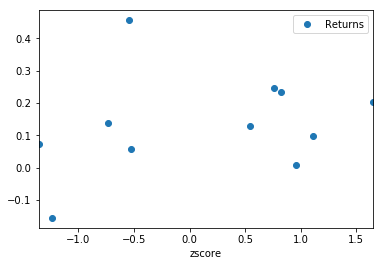

In [25]:
nas_return_zscore = nas_return_zscore[(nas_return_zscore['zscore'] > 0.01) | 
                                 (nas_return_zscore['zscore'] < -0.01)]
nas_return_zscore.plot(x="zscore", y="Returns", style="o")

In [26]:
nas_return_zscore['Returns'].corr(nas_return_zscore['zscore'])


0.2613625562239449